### 5.3 订单消费维度分析并可视化

- 订单、客户、菜品等维度来分析
1. 订单的长度：shape,columns
2. 统计菜品8月份的的平均价格
3. 什么菜最受欢迎
4. 什么时间段大家喜欢来餐厅吃饭
5. 哪个订单ID点的菜最多等

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']='SimHei' ##设置中文显示
%matplotlib inline 
#表示在行内绘制图形
# 1.加载数据
data1=pd.read_excel(r"C:\Users\23665\Desktop\研一上课资料\111\数据分析\数据分析实战\meal_order_detail.xlsx",sheet_name="meal_order_detail1")
data2=pd.read_excel(r"C:\Users\23665\Desktop\研一上课资料\111\数据分析\数据分析实战\meal_order_detail.xlsx",sheet_name="meal_order_detail2")
data3=pd.read_excel(r"C:\Users\23665\Desktop\研一上课资料\111\数据分析\数据分析实战\meal_order_detail.xlsx",sheet_name="meal_order_detail3")

#data1.head()
# 2. 数据预处理（NA处理、合并数据），分析数据
data=pd.concat([data1,data2,data3],axis=0) #axis=0表示按照行拼接数据（列即为1）
#data.head(5)
#data.info()
#10037条数据，18列，non-null前面是非空数据的个数
#data.dropna(axis=1,inplace=False) #表示不修改原数据
data.dropna(axis=1,inplace=True) #按照axis=1，也就是按列删除的空数据，inplace=True表示修改原来数据
data.info()#将所有是NA的列删除

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [4]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei' ##设置中文显示
%matplotlib inline 
#表示在行内绘制图形
# 1.加载数据
data1=pd.read_excel(r"C:\Users\23665\Desktop\研一上课资料\111\数据分析\数据分析实战\meal_order_detail.xlsx",sheet_name="meal_order_detail1")
data2=pd.read_excel(r"C:\Users\23665\Desktop\研一上课资料\111\数据分析\数据分析实战\meal_order_detail.xlsx",sheet_name="meal_order_detail2")
data3=pd.read_excel(r"C:\Users\23665\Desktop\研一上课资料\111\数据分析\数据分析实战\meal_order_detail.xlsx",sheet_name="meal_order_detail3")
data=pd.concat([data1,data2,data3],axis=0)
data.head()
data.info()

In [7]:
data.dropna(axis=1,inplace=True)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


,detail_id,order_id,dishes_id,itemis_add,counts,amounts,add_inprice,emp_id
count,10037.000000,10037.000000,10037.000000,10037.0,10037.000000,10037.000000,10037.0,10037.000000
mean,4712.339344,802.775630,609985.155026,0.0,1.108499,44.821361,0.0,1207.549766
std,1747.410959,320.209032,118.412398,0.0,0.611016,35.815435,0.0,166.800691
min,753.000000,137.000000,606000.000000,0.0,1.000000,1.000000,0.0,982.000000
25%,3369.000000,542.000000,609952.000000,0.0,1.000000,25.000000,0.0,1097.000000
50%,4666.000000,780.000000,609983.000000,0.0,1.000000,35.000000,0.0,1147.000000
75%,5971.000000,1110.000000,610021.000000,0.0,1.000000,56.000000,0.0,1293.000000
max,8246.000000,1324.000000,610072.000000,0.0,10.000000,178.000000,0.0,1610.000000


In [9]:
# 统计卖出菜品的平均价格：将amount列的数据求平均即可
# 方法1：采用pandas自带函数
round(data['amounts'].mean(),2)
# 方法二（当数据量较大时候效率高）：numpy函数处理
#round(np.mean(data['amount']),2)
round(np.mean(data['amounts']),2)

44.82

In [10]:
# 频数统计：什么菜最受欢迎,在dishes_name列中分析(对菜名进行频数统计，取最大的前10名)
#dishes_count=data['dishes_name'].value_counts()[:10] #默认降序排序
dishes_count=data['dishes_name'].value_counts()[:10]
dishes_count

In [12]:
dishes_count.shape
for x,y in enumerate(dishes_count):
    print(x,y)
    

0 323
1 269
2 239
3 216
4 189
5 188
6 187
7 186
8 178
9 173


In [ ]:
# 3. 数据可视化matplotlib
dishes_count.shape #看其维度，是一味地可以直接绘图，这种数据绘制柱状图比较合适
dishes_count.plot(kind='line',color=['r']) #绘制一条折线
dishes_count.plot(kind='bar',fontsize=16) #fontsize字体
#对柱状图加上名字,x是索引，y是值
for x,y in enumerate(dishes_count):
    print(x,y)
    plt.text(x,y+2,y,ha='center',fontsize=12) #前面是位置，后面的值,fontsize=12横轴的位置
#将排名靠前的菜加大营销力度

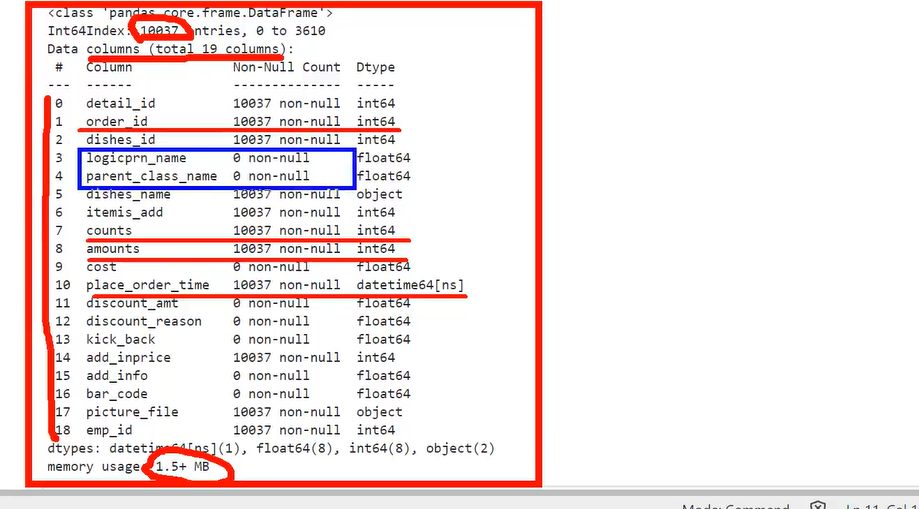
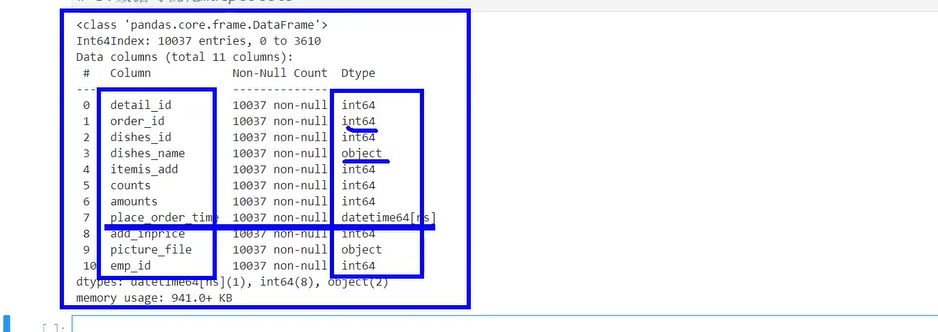

In [13]:
data.groupby(by='order_id')

Text(0, 0.5, '点菜种类')

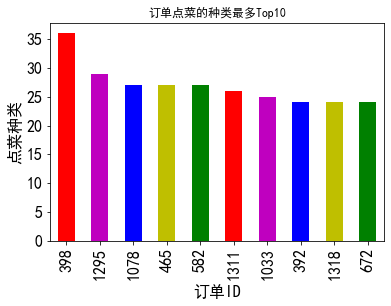

In [14]:
# 订单点菜种类最多的钱10个（1，1，1     1，2，3都是三种，不考虑数量）
data.groupby(by='order_id') #按照order_id进行分组
data_group=data['order_id'].value_counts()[:10]
data_group #降序,前面是订单id后面是次数
data_group.plot(kind='bar',fontsize=16,color=['r','m','b','y','g'])
plt.title('订单点菜的种类最多Top10')
plt.xlabel('订单ID',fontsize=16)
plt.ylabel('点菜种类',fontsize=16)
# 8月份餐厅订单点菜种类前10名，平均点菜25个菜品

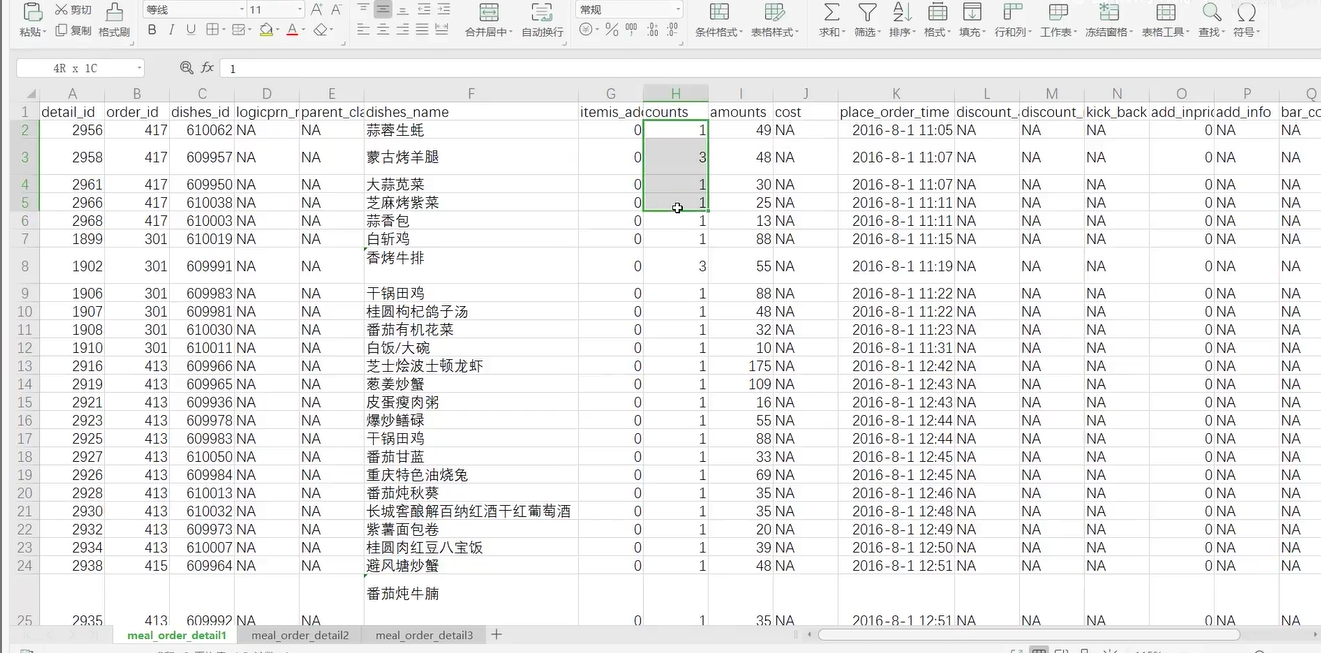

In [19]:
data['total_amounts']=data['counts']*data['amounts']
data_Group=data[['order_id','counts','amounts','total_amounts']].groupby(by='order_id')
group_sum=data_Group.sum()
group_sum
sort_count=group_sum.sort_values(by='counts',ascending=False)
print(sort_count)
sort_count['counts'][:10]

          counts  amounts  total_amounts
order_id                                
398           36      980            980
1033          33     1028           1083
1051          33      730            835
1318          31     1027           1076
557           30      957           1023
...          ...      ...            ...
1029           3      123            123
1035           2       95             95
703            2      127            127
1064           1       48             48
1320           1       78             78

[942 rows x 3 columns]


order_id
398     36
1033    33
1051    33
1318    31
557     30
1078    30
1228    30
1150    29
1295    29
1311    29
Name: counts, dtype: int64

Text(0.5, 1.0, '订单id点菜数量top10')

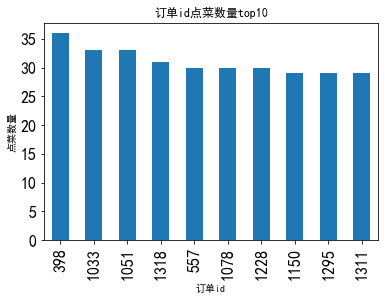

In [4]:
# 订单id点菜平均价格前10名
#订单id点菜数量最多top10（counts中的1，2，3需要将其加和）：
#分组order_id-->counts求和--》排序--》取前10
data['total_amounts']=data['counts']*data['amounts'] #新建一列，统计单道菜消费总额
dataGroup=data[['order_id','counts','amounts','total_amounts']].groupby(by='order_id')
dataGroup #分组之后的数据
Group_sum=dataGroup.sum() #分组求和
sort_count=Group_sum.sort_values(by='counts',ascending=False)
sort_count['counts'][:10].plot(kind='bar',fontsize=16)
plt.xlabel('订单id')
plt.ylabel('点菜数量')
plt.title('订单id点菜数量top10')
#8月份顶点点菜数量前10名

Text(0.5, 1.0, '消费金额前10名')

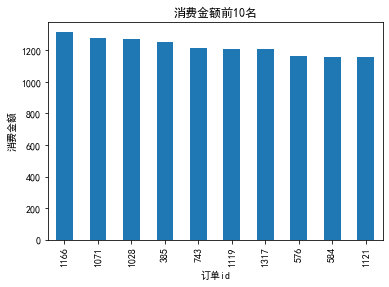

In [5]:
# 哪个订单id吃的钱最多（金额消费最多的）：排序取前10
sort_total_amounts=Group_sum.sort_values(by='total_amounts',ascending=False)
sort_total_amounts['total_amounts'][:10].plot(kind='bar')
plt.xlabel('订单id')
plt.ylabel('消费金额')
plt.title('消费金额前10名')
#根据前10名的推举给大众吃（用户画像）



Text(0.5, 1.0, '消费单价前10名')

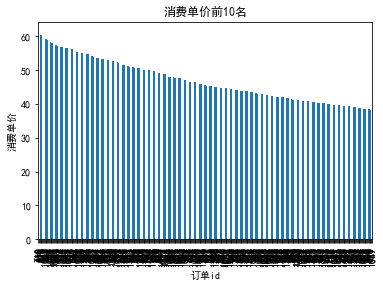

In [6]:
# 哪个订单id平均消费最贵
Group_sum['average']=Group_sum['total_amounts']/Group_sum['counts']
sort_average=Group_sum.sort_values(by='average',ascending=False)
sort_average
sort_average['average'][100:500].plot(kind='bar')
plt.xlabel('订单id')
plt.ylabel('消费单价')
plt.title('消费单价前10名')

### 5.4 日期与时间维度进行点菜量分析
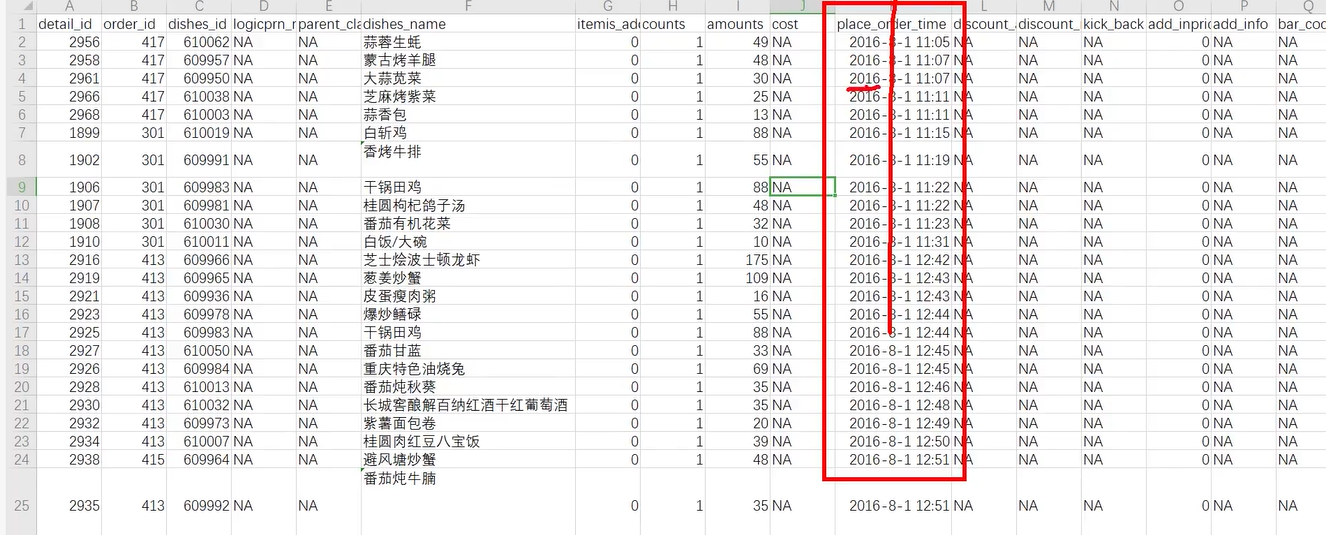
- 年月日时间没有秒

- 关于groupby与count函数的介绍

https://blog.csdn.net/qq_39290990/article/details/121435796

In [25]:
import pandas as pd
df = pd.DataFrame(data={'user':['user1','user1','user1','user2','user2','user3','user2'],
                        '交易类型':[0,0,1,1,1,1,0],
                        '消费金额':[12,12,12,15,15,17,20],
                        '消费数量':[2,2,2,5,5,7,2]})
df
df.groupby(by='user').sum()
df.groupby(by='user').agg({'交易类型':{'min','max','mean'},'消费数量':{'min','max','mean'}})

交易类型               消费数量         
       min      mean max  min mean max
user                                  
user1    0  0.333333   1    2  2.0   2
user2    0  0.666667   1    2  4.0   5
user3    1  1.000000   1    7  7.0   7

Text(0.5, 1.0, '下单量与小时的关系图')

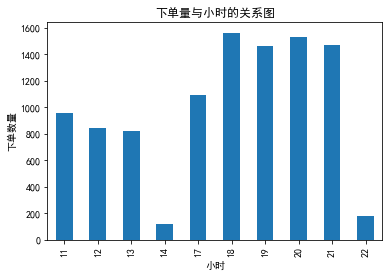

In [30]:
# 一天中什么时间段点菜量比较集中
data['hourcount']=1 #新建一列，起到计数的概念（用来记录小时），需要对该列进行汇总求和
data['time']=pd.to_datetime(data['place_order_time']) #将时间转换为日期类型进行存储
data['hour']=data['time'].map(lambda x:x.hour) #存储当前时间的小时，后面按照小时数进行分组求和
gp_by_hour=data.groupby(by='hour').count()['hourcount'] #按照hour分组求和
gp_by_hour
gp_by_hour.plot(kind='bar')
plt.xlabel('小时')
plt.ylabel('下单数量')
plt.title('下单量与小时的关系图') #这个是8月份所有数据
#在晚上下单量比较多，中午也比较多，在下午几乎没有下单量

Text(0.5, 1.0, '点菜数量与日期的关系图')

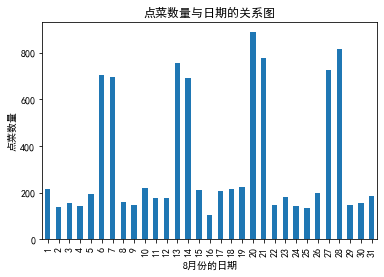

In [8]:
# 8月份哪一天的订餐数量最多
data['daycount']=1
data['day']=data['time'].map(lambda x:x.day) #天数
gp_by_day=data.groupby(by='day').count()['daycount']
gp_by_day.plot(kind='bar')
plt.xlabel('8月份的日期')
plt.ylabel('点菜数量')
plt.title('点菜数量与日期的关系图') 
#可以知道在周末的时候点菜数量最多
#拓展：排序，取处点菜量最大的前5天

Text(0.5, 1.0, '点菜数量与星期的关系图')

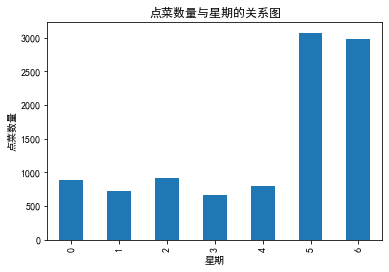

In [10]:
#分析星期几的人数最多，订餐数最多，映射数据到星期
data['weekcount']=1
data['weekday']=data['time'].map(lambda x:x.weekday()) #数据映射到星期
data['weekday'] #也就是星期是从0开始的,0表示星期1
gp_by_weekday=data.groupby(by='weekday').count()['weekcount']
gp_by_weekday.plot(kind='bar')
plt.xlabel('星期')
plt.ylabel('点菜数量')
plt.title('点菜数量与星期的关系图') 

### 5.3 项目总结